Classes found: ['Diseased', 'Dried', 'Healthy']

Sample entries:
                                                path     class  height  width
0  /kaggle/input/batel-leaf-dataset/Betel Leaf Da...  Diseased    6112   6112
1  /kaggle/input/batel-leaf-dataset/Betel Leaf Da...  Diseased    6112   6112
2  /kaggle/input/batel-leaf-dataset/Betel Leaf Da...  Diseased    6112   6112
3  /kaggle/input/batel-leaf-dataset/Betel Leaf Da...  Diseased    6112   6112
4  /kaggle/input/batel-leaf-dataset/Betel Leaf Da...  Diseased    6112   6112

Class distribution:
class
Dried       340
Healthy     333
Diseased    220
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


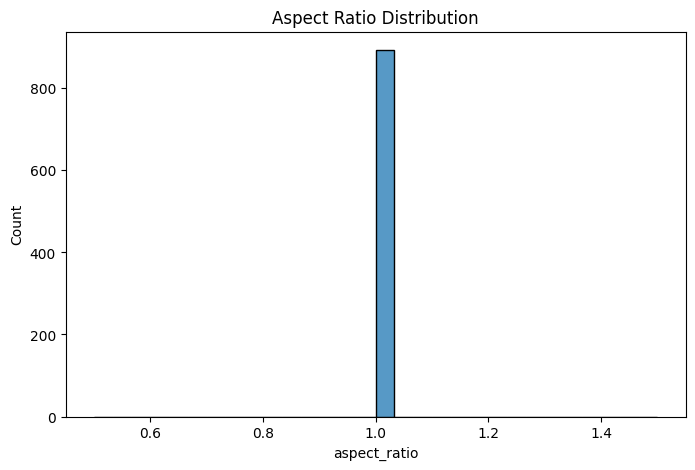

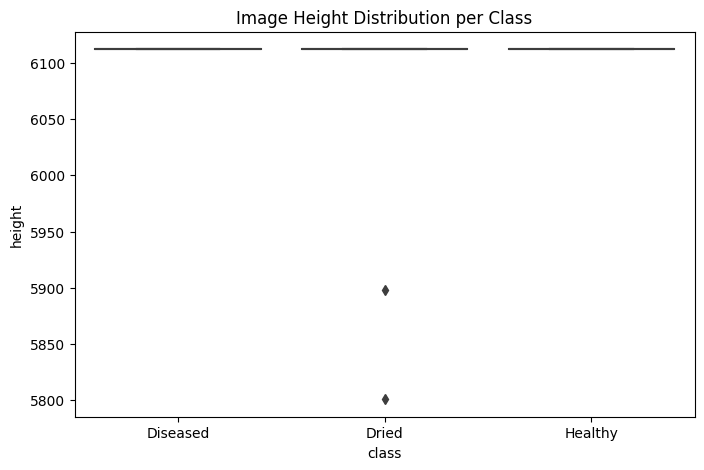

Computing RGB/HSV stats: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]



RGB/HSV mean/std summary:
           R_mean      R_std      G_mean      G_std      B_mean      B_std  \
count   20.000000  20.000000   20.000000  20.000000   20.000000  20.000000   
mean   158.223602  60.500712  166.787008  37.458642  163.011909  41.771130   
std      8.296913   7.185983    7.285863  11.869491    7.006443   8.167971   
min    142.968054  43.435114  145.645051  17.860924  145.667454  24.750282   
25%    153.833568  56.442079  163.837845  29.761833  159.615000  39.147868   
50%    158.466304  60.596207  167.415784  34.063269  162.417403  40.962408   
75%    160.476589  64.240123  172.632145  46.514551  166.925191  46.126167   
max    173.622374  73.600806  176.920709  59.265041  174.220334  56.912105   

           H_mean     S_mean      V_mean  
count   20.000000  20.000000   20.000000  
mean    93.792637  35.354346  170.203615  
std      6.839521   9.252077    6.698205  
min     74.255337  17.503272  150.926033  
25%     91.032063  30.047899  165.949832  
50%     95.4

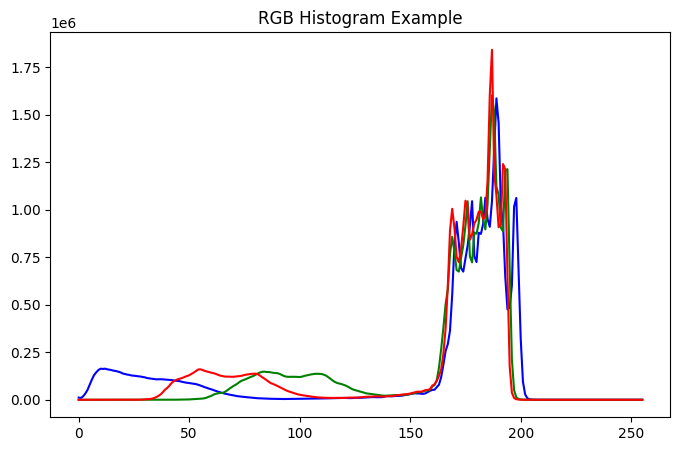

Brightness/Contrast: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]



Brightness mean/std (subset): [164.65112204  41.22281756]


Sharpness: 100%|██████████| 893/893 [09:29<00:00,  1.57it/s]


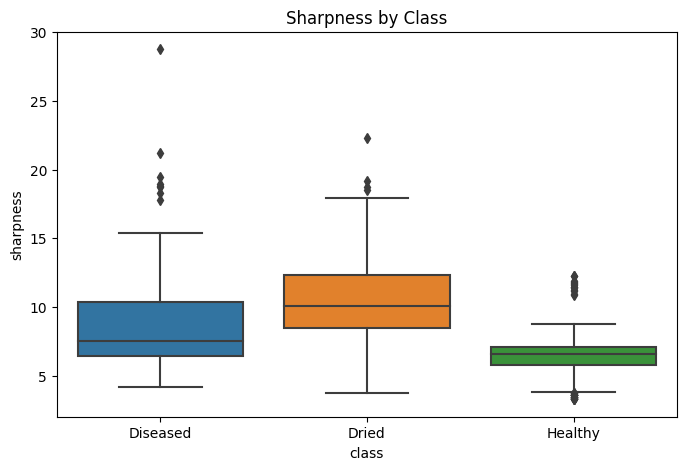

Gray-World Check: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]



Channel means (BGR): [158.22360172 166.78700776 163.01190929]


Checking duplicates: 100%|██████████| 893/893 [06:55<00:00,  2.15it/s]



Found 3 potential duplicates.
Duplicate pair: ('/kaggle/input/batel-leaf-dataset/Betel Leaf Dataset A Primary Dataset From Field And Controlled Environment/Betel Leaf Dataset/Controlled Environment/Diseased/CE_Diseased_Leaf_040.jpg', '/kaggle/input/batel-leaf-dataset/Betel Leaf Dataset A Primary Dataset From Field And Controlled Environment/Betel Leaf Dataset/Controlled Environment/Diseased/CE_Diseased_Leaf_058.jpg')
Duplicate pair: ('/kaggle/input/batel-leaf-dataset/Betel Leaf Dataset A Primary Dataset From Field And Controlled Environment/Betel Leaf Dataset/Controlled Environment/Healthy/CE_Healthy_Leaf_294.jpg', '/kaggle/input/batel-leaf-dataset/Betel Leaf Dataset A Primary Dataset From Field And Controlled Environment/Betel Leaf Dataset/Controlled Environment/Healthy/CE_Healthy_Leaf_293.jpg')
Duplicate pair: ('/kaggle/input/batel-leaf-dataset/Betel Leaf Dataset A Primary Dataset From Field And Controlled Environment/Betel Leaf Dataset/Controlled Environment/Healthy/CE_Healthy_Leaf

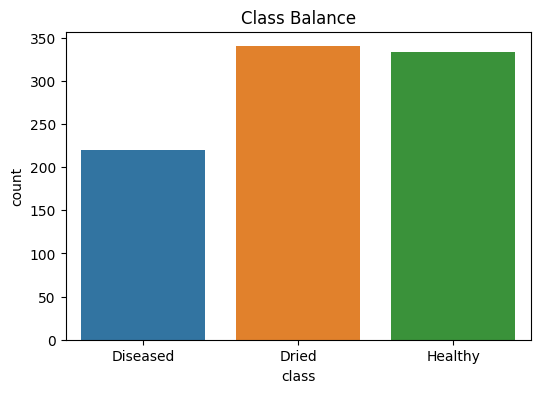


Train: 714 | Test: 179


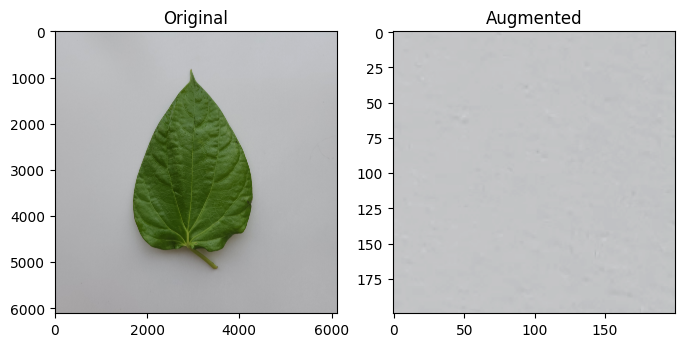

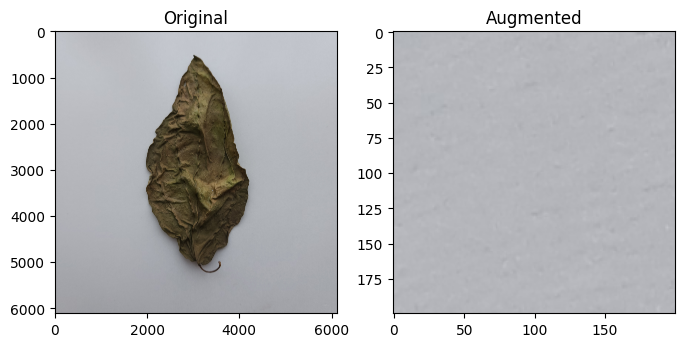

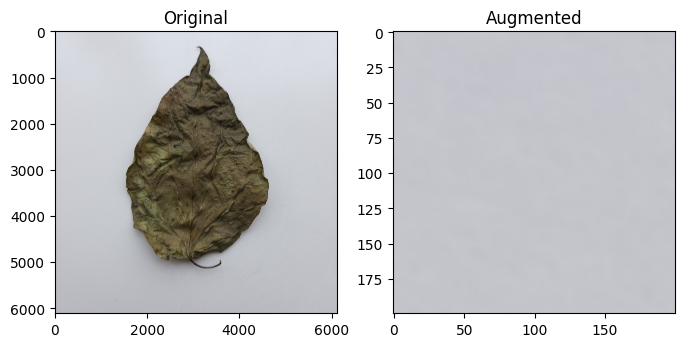


✅ EDA complete — all key outputs displayed.


In [1]:
# ===============================
# CSE475 (Fall 2025) - Task 1: EDA
# Dataset: Betel Leaf Dataset (btdym2t6mt/1)
# Author: <Your Name>
# ===============================

import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
from PIL import Image
import imagehash
from sklearn.model_selection import train_test_split
import albumentations as A
from albumentations.pytorch import ToTensorV2

# ---- CONFIG ----
base_path = "/kaggle/input/batel-leaf-dataset/Betel Leaf Dataset A Primary Dataset From Field And Controlled Environment/Betel Leaf Dataset/Controlled Environment"  # change if different
classes = os.listdir(base_path)
print("Classes found:", classes)

# ===============================
# 1. Load basic dataset info
# ===============================
data = []
for cls in classes:
    folder = os.path.join(base_path, cls)
    for f in os.listdir(folder):
        path = os.path.join(folder, f)
        img = cv2.imread(path)
        if img is not None:
            h, w, c = img.shape
            data.append([path, cls, h, w])

df = pd.DataFrame(data, columns=["path", "class", "height", "width"])
print("\nSample entries:")
print(df.head())
print("\nClass distribution:")
print(df["class"].value_counts())

# ===============================
# 2. Resolution and Aspect Ratio
# ===============================
df["aspect_ratio"] = df["width"] / df["height"]
plt.figure(figsize=(8,5))
sns.histplot(df["aspect_ratio"], bins=30)
plt.title("Aspect Ratio Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="class", y="height", data=df)
plt.title("Image Height Distribution per Class")
plt.show()

# ===============================
# 3. RGB & HSV Statistics
# ===============================
def color_stats(img):
    stats = {}
    for i, ch in enumerate(["R","G","B"]):
        stats[ch+"_mean"] = np.mean(img[:,:,i])
        stats[ch+"_std"] = np.std(img[:,:,i])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    stats["H_mean"] = np.mean(hsv[:,:,0])
    stats["S_mean"] = np.mean(hsv[:,:,1])
    stats["V_mean"] = np.mean(hsv[:,:,2])
    return stats

subset = df.sample(20, random_state=42)
rgb_stats = []
for p in tqdm(subset["path"], desc="Computing RGB/HSV stats"):
    img = cv2.imread(p)
    rgb_stats.append(color_stats(img))
rgb_df = pd.DataFrame(rgb_stats)
print("\nRGB/HSV mean/std summary:")
print(rgb_df.describe())

# Plot RGB hist for one random sample
sample_img = cv2.imread(subset.iloc[0]["path"])
colors = ('b','g','r')
plt.figure(figsize=(8,5))
for i,col in enumerate(colors):
    histr = cv2.calcHist([sample_img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
plt.title("RGB Histogram Example")
plt.show()

# ===============================
# 4. Brightness/Contrast Spread
# ===============================
def brightness_contrast(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray.mean(), gray.std()

br_ct = []
for p in tqdm(subset["path"], desc="Brightness/Contrast"):
    img = cv2.imread(p)
    br_ct.append(brightness_contrast(img))
br_ct = np.array(br_ct)
print("\nBrightness mean/std (subset):", br_ct.mean(axis=0))

# ===============================
# 5. Sharpness/Noise Proxy (Laplacian)
# ===============================
def sharpness(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

df["sharpness"] = [sharpness(cv2.imread(p)) for p in tqdm(df["path"], desc="Sharpness")]
plt.figure(figsize=(8,5))
sns.boxplot(x="class", y="sharpness", data=df)
plt.title("Sharpness by Class")
plt.show()

# ===============================
# 6. White Balance (Gray-World)
# ===============================
means = []
for p in tqdm(subset["path"], desc="Gray-World Check"):
    img = cv2.imread(p)
    means.append(np.mean(img, axis=(0,1)))
means = np.array(means)
print("\nChannel means (BGR):", means.mean(axis=0))

# ===============================
# 7. Duplicate Detection (Perceptual Hash)
# ===============================
hashes = {}
dupes = []
for p in tqdm(df["path"], desc="Checking duplicates"):
    try:
        h = imagehash.phash(Image.open(p))
        if h in hashes:
            dupes.append((p, hashes[h]))
        else:
            hashes[h] = p
    except:
        pass

print(f"\nFound {len(dupes)} potential duplicates.")
if dupes:
    for d in dupes[:5]:
        print("Duplicate pair:", d)

# ===============================
# 8. Class Balance Plot
# ===============================
plt.figure(figsize=(6,4))
sns.countplot(x="class", data=df)
plt.title("Class Balance")
plt.show()

# ===============================
# 9. Train-Test Split (Leakage Safeguard)
# ===============================
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["class"], random_state=42)
print(f"\nTrain: {len(train_df)} | Test: {len(test_df)}")

# ===============================
# 10. Augmentation Probe
# ===============================
transform = A.Compose([
    A.RandomCrop(height=200, width=200),
    A.HorizontalFlip(p=0.5),
    A.ColorJitter(p=0.5),
    A.GaussianBlur(p=0.3),
    ToTensorV2()
])

sample_paths = list(subset["path"].values)[:3]
for p in sample_paths:
    img = cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    augmented = transform(image=img)["image"].permute(1,2,0).numpy()
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1); plt.imshow(img); plt.title("Original")
    plt.subplot(1,2,2); plt.imshow(augmented); plt.title("Augmented")
    plt.show()

print("\n✅ EDA complete — all key outputs displayed.")


In [2]:
# ======== IMPORTS ========
import os
import time
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# ======== CONFIG ========
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_DIR = "/kaggle/input/batel-leaf-dataset/Betel Leaf Dataset A Primary Dataset From Field And Controlled Environment/Betel Leaf Dataset/Controlled Environment"  # 🟢 তোমার dataset path দাও
BATCH_SIZE = 8
EPOCHS = 20
RESULT_FILE = "results_mobilenet.csv"

# ৯টা ratio list (train:test)
SPLITS = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# ======== TRANSFORMS ========
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ======== DATASET LOAD ========
dataset = datasets.ImageFolder(DATA_DIR, transform=transform)
num_classes = len(dataset.classes)
print(f"Total samples: {len(dataset)}, Classes: {dataset.classes}")

# ======== CSV Save Function ========
def save_results_to_csv(ratio, y_true, y_pred, start_time, end_time, file_path=RESULT_FILE):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    duration = round(end_time - start_time, 2)

    df_row = pd.DataFrame([{
        "Ratio": f"{int(ratio*100)}:{int((1-ratio)*100)}",
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Time (sec)": duration
    }])

    if os.path.exists(file_path):
        existing = pd.read_csv(file_path)
        df = pd.concat([existing, df_row], ignore_index=True)
    else:
        df = df_row

    df.to_csv(file_path, index=False)
    print(f"✅ Results saved for ratio {int(ratio*100)}:{int((1-ratio)*100)}")

# ======== TRAINING LOOP ========
for r in SPLITS:
    print(f"\n🔹 Running ratio {int(r*100)}:{int((1-r)*100)}")

    train_size = int(r * len(dataset))
    test_size = len(dataset) - train_size
    train_data, test_data = random_split(dataset, [train_size, test_size])

    # validation split (10% of training)
    val_size = int(0.1 * len(train_data))
    train_size = len(train_data) - val_size
    train_data, val_data = random_split(train_data, [train_size, val_size])

    train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

    # ===== MODEL =====
    model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
    model.classifier[1] = nn.Linear(model.last_channel, num_classes)
    model = model.to(DEVICE)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # ===== TRAIN =====
    for epoch in range(EPOCHS):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100 * correct / total

        # ===== VALIDATION =====
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(DEVICE), labels.to(DEVICE)
                outputs = model(images)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        val_acc = 100 * correct / total

        print(f"Epoch [{epoch+1}/{EPOCHS}]  Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")

    # ===== TEST =====
    print("Evaluating on test set...")
    model.eval()
    y_true, y_pred = [], []
    start = time.time()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    end = time.time()

    # ===== SAVE RESULTS =====
    save_results_to_csv(r, y_true, y_pred, start, end)

print("\n All ratios completed! Check results_mobilenet.csv for summary.")


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


Total samples: 893, Classes: ['Diseased', 'Dried', 'Healthy']

🔹 Running ratio 90:9


100%|██████████| 13.6M/13.6M [00:00<00:00, 114MB/s] 


Epoch [1/20]  Train Acc: 85.20% | Val Acc: 97.50%
Epoch [2/20]  Train Acc: 91.15% | Val Acc: 96.25%
Epoch [3/20]  Train Acc: 94.61% | Val Acc: 96.25%
Epoch [4/20]  Train Acc: 94.88% | Val Acc: 80.00%
Epoch [5/20]  Train Acc: 90.46% | Val Acc: 98.75%
Epoch [6/20]  Train Acc: 94.74% | Val Acc: 92.50%
Epoch [7/20]  Train Acc: 93.36% | Val Acc: 96.25%
Epoch [8/20]  Train Acc: 94.33% | Val Acc: 98.75%
Epoch [9/20]  Train Acc: 96.13% | Val Acc: 98.75%
Epoch [10/20]  Train Acc: 95.99% | Val Acc: 100.00%
Epoch [11/20]  Train Acc: 99.03% | Val Acc: 98.75%
Epoch [12/20]  Train Acc: 98.48% | Val Acc: 96.25%
Epoch [13/20]  Train Acc: 96.27% | Val Acc: 96.25%
Epoch [14/20]  Train Acc: 96.96% | Val Acc: 100.00%
Epoch [15/20]  Train Acc: 96.68% | Val Acc: 93.75%
Epoch [16/20]  Train Acc: 98.76% | Val Acc: 100.00%
Epoch [17/20]  Train Acc: 97.51% | Val Acc: 87.50%
Epoch [18/20]  Train Acc: 95.57% | Val Acc: 92.50%
Epoch [19/20]  Train Acc: 97.37% | Val Acc: 97.50%
Epoch [20/20]  Train Acc: 99.45% | Va